# T2.2 - CLUSTERIZAÇÃO

## Integrantes:

* Giulia Duncan Coutinho - 1410398
* Matheus Falcão - 1410962
* Igor Vieira - 1410492

Utilizando o dataset1.csv em anexo e desconsiderando a variável target, façam diferentes clusterizações (variando as features, os algoritmos de clustering e suas configurações). Avaliem cada clusterização individualmente e, ao final, façam uma análise comparativa, discutam os resultados e escolham e justifiquem qual foi a melhor clusterização obtida.

## SETUP

In [1]:
from IPython.display import display, Markdown, Latex
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator


In [2]:
dataset2 = pd.read_csv('dataset1.csv')

In [3]:
dataset2.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,target
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98,24.0
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14,21.6
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03,34.7
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94,33.4
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33,36.2
5,0.0,0,6.430,6.0622,222,394.12,0.02985,2.18,0.458,58.7,3,18.7,5.21,28.7
6,12.5,0,6.012,5.5605,311,395.60,0.08829,7.87,0.524,66.6,5,15.2,12.43,22.9
7,12.5,0,6.172,5.9505,311,396.90,0.14455,7.87,0.524,96.1,5,15.2,19.15,27.1
8,12.5,0,5.631,6.0821,311,386.63,0.21124,7.87,0.524,100.0,5,15.2,29.93,16.5
9,12.5,0,6.004,6.5921,311,386.71,0.17004,7.87,0.524,85.9,5,15.2,17.10,18.9


In [4]:
dataset2.dtypes

V1        float64
V2          int64
V3        float64
V4        float64
V5          int64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11         int64
V12       float64
V13       float64
target    float64
dtype: object

In [5]:
X = dataset2.drop(columns=['target'])

In [6]:
num_clusters = 2

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=num_clusters, random_state=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [8]:
y_pred = model.predict(X)

In [9]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,18.0,0,6.575,4.0900,296,396.90,0.00632,2.31,0.538,65.2,1,15.3,4.98
1,0.0,0,6.421,4.9671,242,396.90,0.02731,7.07,0.469,78.9,2,17.8,9.14
2,0.0,0,7.185,4.9671,242,392.83,0.02729,7.07,0.469,61.1,2,17.8,4.03
3,0.0,0,6.998,6.0622,222,394.63,0.03237,2.18,0.458,45.8,3,18.7,2.94
4,0.0,0,7.147,6.0622,222,396.90,0.06905,2.18,0.458,54.2,3,18.7,5.33


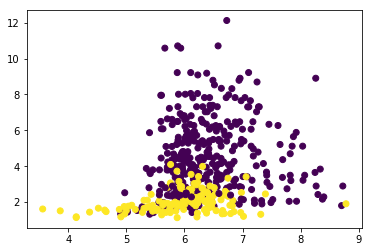

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X.V3, X.V4, c=y_pred)

plt.show()

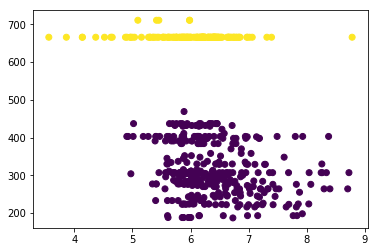

In [11]:
plt.scatter(X.V3, X.V5, c=y_pred)

plt.show()

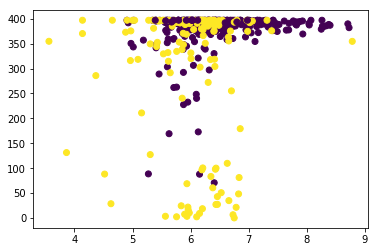

In [12]:
plt.scatter(X.V3, X.V6, c=y_pred)

plt.show()

# KMEDOIDS

In [21]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric
num_clusters = 2

start_medoids_indexes = np.random.randint(0, X.shape[0], num_clusters)

# Alguns valores em type_metric: EUCLIDEAN, EUCLIDEAN_SQUARE, MANHATTAN, MINKOWSKI, CHEBYSHEV
metric = distance_metric(type_metric.MANHATTAN)

In [24]:
model = kmedoids(X.values, start_medoids_indexes, metric=metric)
model.process()

In [25]:
clusters_indexes = model.get_clusters()

In [26]:
y_pred = np.zeros(len(X))

for cluster_idx, item_idx in enumerate(clusters_indexes):
    y_pred[item_idx] = cluster_idx

In [ ]:
plt.scatter(X.V3, X.V4, c=y_pred)

plt.show()

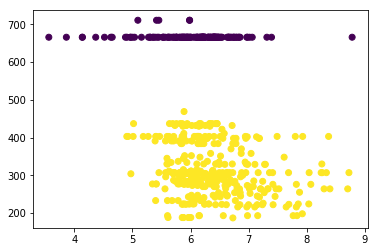

In [27]:
plt.scatter(X.V3, X.V5, c=y_pred)

plt.show()

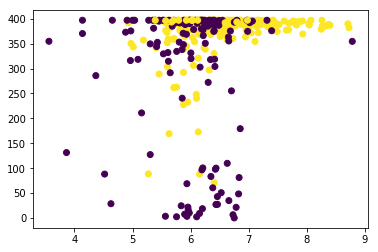

In [28]:
plt.scatter(X.V3, X.V6, c=y_pred)

plt.show()